### Road Lane Line Detection 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(540, 960, 3)


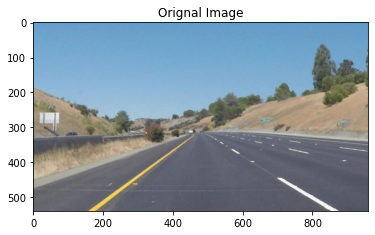

In [2]:
def roi(img, vertices):
    mask = np.zeros_like(img)
    channel_Count = img.shape[2]
    match_mask_color = (255,)*channel_Count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


img = cv2.imread('road.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)
height = img.shape[0]
width = img.shape[1]
roi_vertices = [(0,height), (width/2, (height/2)+30), (width,height)]
roi_image = roi(img, np.array([roi_vertices], np.int32))
plt.imshow(img)
plt.title("Orignal Image")
plt.show()

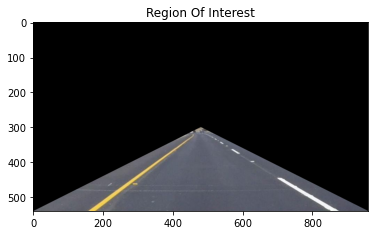

In [3]:
plt.imshow(roi_image)
plt.title('Region Of Interest')
plt.show()

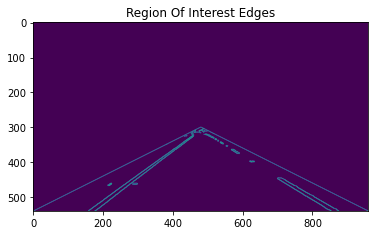

In [4]:
gray_image = cv2.cvtColor(roi_image, cv2.COLOR_RGB2GRAY)
canny_edges = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edges)
plt.title('Region Of Interest Edges')
plt.show()

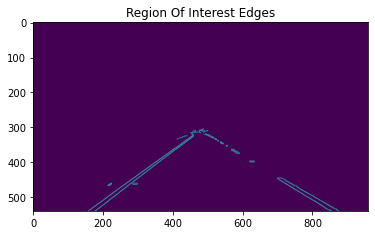

In [5]:
def roi2(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

gray_image2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
canny_edges2 = cv2.Canny(gray_image2, 100, 200)
roi_image2 = roi2(canny_edges2, np.array([roi_vertices], np.int32))
plt.imshow(roi_image2)
plt.title('Region Of Interest Edges')
plt.show()

In [6]:
def draw_line(img, lines):
    copy_img = np.copy(img)
    blank_image = np.zeros((copy_img.shape[0], copy_img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(blank_image, (x1,y1), (x2,y2), (0,255,0), 3)
    copy_img = cv2.addWeighted(copy_img, 0.8, blank_image, 1, 0.0)
    return copy_img

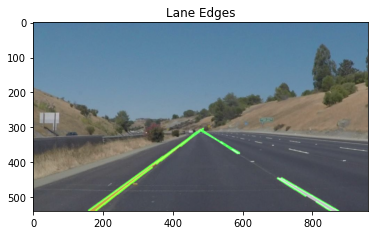

In [7]:
lines = cv2.HoughLinesP(roi_image2, rho=6, theta=np.pi/60, threshold=160, lines=np.array([]), minLineLength=40, maxLineGap=25)
final_img = draw_line(img, lines)
plt.imshow(final_img)
plt.title('Lane Edges')
plt.show()

### For Video 

In [8]:
def process(img):
    height = img.shape[0]
    width = img.shape[1]
    roi_vertices = [(0,height), (width/2, (height/2)+190), (width,height)]
    gray_image2 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    canny_edges2 = cv2.Canny(gray_image2, 100, 120)
    roi_image2 = roi2(canny_edges2, np.array([roi_vertices], np.int32))
    lines = cv2.HoughLinesP(roi_image2, rho=2, theta=np.pi/60, threshold=50, lines=np.array([]), minLineLength=40, maxLineGap=100)
    final_img = draw_line(img, lines)
    return final_img

cap = cv2.VideoCapture('testvideo2.mp4')
while(cap.isOpened()):
    ret, frame = cap.read()
    frame = process(frame)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not iterable